<a href="https://colab.research.google.com/github/meetrafay/deep-learning-assignment_01/blob/main/DL_assignment_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, InputLayer, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [ ]:
def generate_harder_spiral_data(points_per_class=200, noise=0.4, num_classes=3):
  """Generates data points arranged in interweaving spirals.

  This function creates a dataset with data points forming spirals,
  which is often used to test the ability of machine learning models
  to learn complex, non-linear patterns.

  Args:
    points_per_class: The number of data points to generate for each spiral/class.
    noise: The amount of noise to add to the spiral pattern.
    num_classes: The number of spirals/classes to generate.

  Returns:
    X: A NumPy array containing the data points (x, y coordinates).
    y: A NumPy array containing the class labels for each data point.
  """
  N = points_per_class
  D = 2
  K = num_classes
  X = np.zeros((N*K,D))
  y = np.zeros(N*K, dtype='uint8')
  for j in range(K):
    ix = range(N*j, N*(j+1))
    r = np.linspace(0.0, 1, N)
    t = np.linspace(j*4, (j+1)*4, N) + np.random.randn(N)*noise
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j
  return X, y

In [ ]:
X, y = generate_harder_spiral_data()

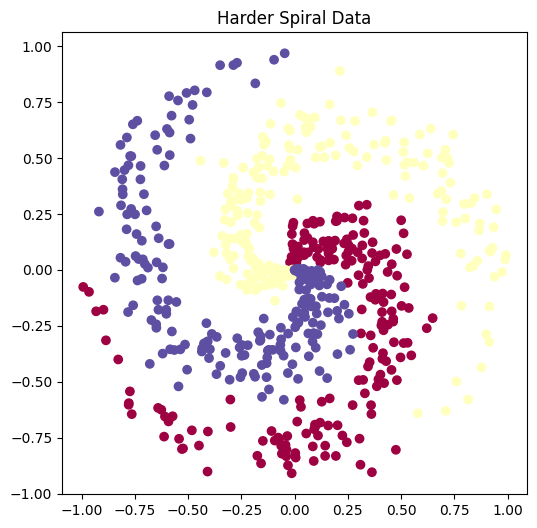

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="Spectral")
plt.title('Harder Spiral Data')
plt.show()

In [ ]:
# One-hot encode targets
y_cat = to_categorical(y)

In [ ]:
# Scale inputs
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y_cat, test_size=0.2, random_state=42)

In [ ]:
def plot_accuracy_and_loss(model):
  fig, axs = plt.subplots(1, 2, figsize=(12, 4))

  # Accuracy plot
  axs[0].plot(model.history['accuracy'], label='Train Acc')
  # axs[0].plot(model.history['val_accuracy'], label='Val Acc', linestyle='--')
  axs[0].set_title('Accuracy (Train vs Va|l)')
  axs[0].set_xlabel('Epoch')
  axs[0].set_ylabel('Accuracy')
  axs[0].legend()
  axs[0].grid(True)

  # Loss plot
  axs[1].plot(model.history['loss'], label='Train Loss')
  # axs[1].plot(model.history['val_loss'], label='Val Loss', linestyle='--')
  axs[1].set_title('Loss (Train vs Val)')
  axs[1].set_xlabel('Epoch')
  axs[1].set_ylabel('Loss')
  axs[1].legend()
  axs[1].grid(True)

  plt.tight_layout()
  plt.show()

In [ ]:
def get_test_accuracy(train_model):
  """
  Evaluates the trained model on the test set and prints the accuracy.

  Args:
    train_model: The trained Keras model.
  """
  y_pred = train_model.predict(x_test)
  y_pred_classes = np.argmax(y_pred, axis=1)
  y_test_classes = np.argmax(y_test, axis=1)

  print('Accuracy:', accuracy_score(y_test_classes, y_pred_classes))

In [ ]:
model_mlp_01 = Sequential()

model_mlp_01.add(InputLayer(input_shape=(2,)))
model_mlp_01.add(Dense(3, activation='relu'))
model_mlp_01.add(Dense(3, activation='softmax'))

model_mlp_01.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_mlp_01.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 3)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21 (84.00 B)

 Trainable params: 21 (84.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
train_model_01 = model_mlp_01.fit(x_train, y_train, epochs=300, verbose=1, batch_size=10)

Epoch 1/300
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2906 - loss: 1.1417
Epoch 2/300
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3727 - loss: 1.0870
Epoch 3/300
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3432 - loss: 1.0738
Epoch 4/300
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3742 - loss: 1.0383
Epoch 5/300
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4720 - loss: 0.9958
Epoch 6/300
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4501 - loss: 0.9823
Epoch 7/300
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4506 - loss: 0.9706
Epoch 8/300
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4470 - loss: 0.9647
Epoch 9/300
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4820 - loss: 0.9412
Epoch 10/300
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4750 - loss: 0.9540
Epoch 11/300
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5222 - loss: 0.9289
Epoch 12/300
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

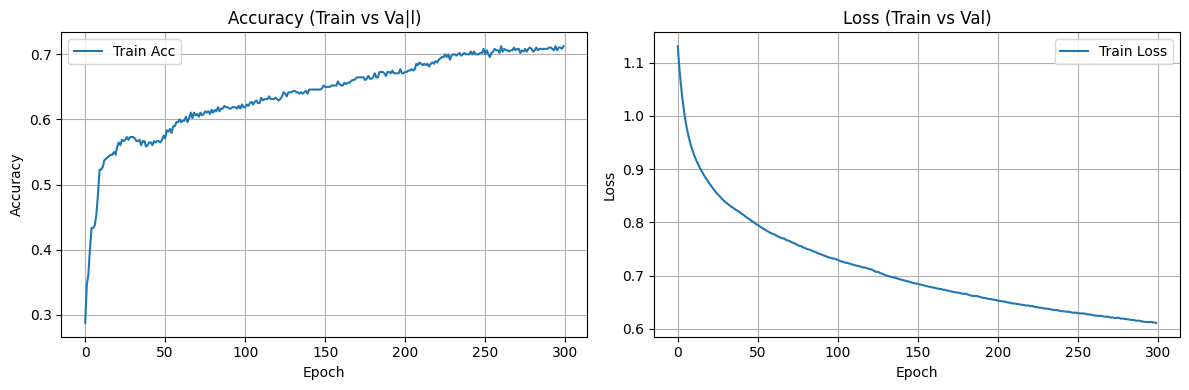

In [ ]:
plot_accuracy_and_loss(train_model_01)

In [ ]:
get_test_accuracy(model_mlp_01)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Accuracy: 0.65


In [ ]:
train_model_02 = model_mlp_01.fit(x_train, y_train, epochs=500, verbose=1, batch_size=20)

Epoch 1/500
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7131 - loss: 0.5967   
Epoch 2/500
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7252 - loss: 0.6010 
Epoch 3/500
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6780 - loss: 0.6789 
Epoch 4/500
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7009 - loss: 0.6085 
Epoch 5/500
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6931 - loss: 0.5937 
Epoch 6/500
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6960 - loss: 0.6332 
Epoch 7/500
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7290 - loss: 0.5843 
Epoch 8/500
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7161 - loss: 0.6033 
Epoch 9/500
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7150 - loss: 0.6132 
Epoch 10/500
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6956 - loss: 0.6191
Epoch 11/500
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6939 - loss: 0.6302
Epoch 12/500
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

In [ ]:
get_test_accuracy(model_mlp_01)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Accuracy: 0.6333333333333333


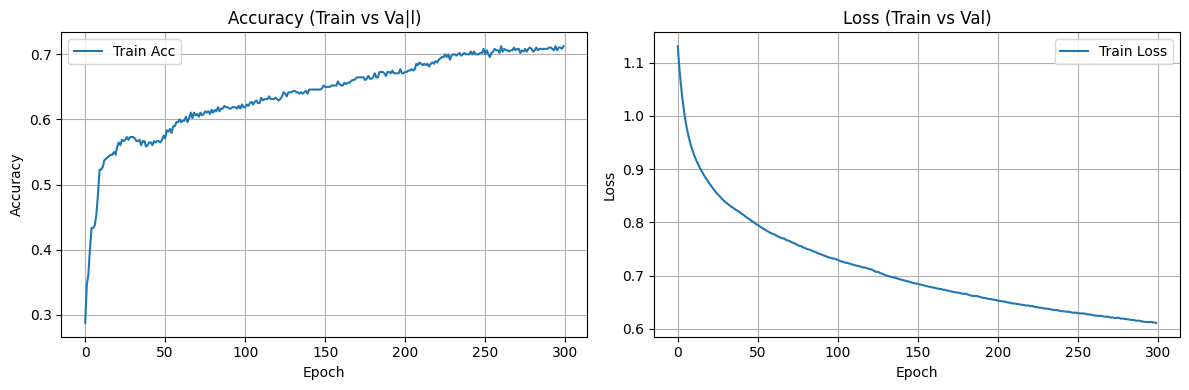

In [ ]:
plot_accuracy_and_loss(train_model_01)

In [ ]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=30,
    restore_best_weights=True,
    verbose=1
)

checkpoint = ModelCheckpoint(
    'best_model_spiral.keras',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)


In [ ]:
history = model_mlp_01.fit(
    x_train, y_train,
    epochs=500,
    callbacks=[early_stop, checkpoint],
    verbose=2,
    batch_size=20
)


Epoch 1/500
24/24 - 0s - 3ms/step - accuracy: 0.7167 - loss: 0.5588
Epoch 2/500
24/24 - 0s - 7ms/step - accuracy: 0.7167 - loss: 0.5586
Epoch 3/500


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/model_checkpoint.py:209: UserWarning: Can save best model only with val_loss available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


24/24 - 0s - 6ms/step - accuracy: 0.7167 - loss: 0.5584
Epoch 4/500
24/24 - 0s - 5ms/step - accuracy: 0.7146 - loss: 0.5585
Epoch 5/500
24/24 - 0s - 5ms/step - accuracy: 0.7167 - loss: 0.5586
Epoch 6/500
24/24 - 0s - 3ms/step - accuracy: 0.7146 - loss: 0.5586
Epoch 7/500
24/24 - 0s - 3ms/step - accuracy: 0.7125 - loss: 0.5585
Epoch 8/500
24/24 - 0s - 6ms/step - accuracy: 0.7125 - loss: 0.5584
Epoch 9/500
24/24 - 0s - 5ms/step - accuracy: 0.7146 - loss: 0.5586
Epoch 10/500
24/24 - 0s - 3ms/step - accuracy: 0.7188 - loss: 0.5586
Epoch 11/500
24/24 - 0s - 3ms/step - accuracy: 0.7167 - loss: 0.5583
Epoch 12/500
24/24 - 0s - 6ms/step - accuracy: 0.7125 - loss: 0.5587
Epoch 13/500
24/24 - 0s - 6ms/step - accuracy: 0.7167 - loss: 0.5581
Epoch 14/500
24/24 - 0s - 3ms/step - accuracy: 0.7146 - loss: 0.5583
Epoch 15/500
24/24 - 0s - 3ms/step - accuracy: 0.7125 - loss: 0.5584
Epoch 16/500
24/24 - 0s - 3ms/step - accuracy: 0.7146 - loss: 0.5583
Epoch 17/500
24/24 - 0s - 3ms/step - accuracy: 0.7146

In [ ]:
model_mlp_02 = Sequential()

model_mlp_02.add(InputLayer(input_shape=(2,)))
model_mlp_02.add(Dense(6, activation='relu'))
model_mlp_02.add(Dense(3, activation='relu'))
model_mlp_02.add(Dense(3, activation='softmax'))

model_mlp_02.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_mlp_02.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 6)              │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 3)              │            21 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51 (204.00 B)

 Trainable params: 51 (204.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_01 = model_mlp_02.fit(
    x_train, y_train,
    epochs=500,
    callbacks=[early_stop, checkpoint],
    verbose=2,
    batch_size=20
)


Epoch 1/500
24/24 - 1s - 44ms/step - accuracy: 0.1625 - loss: 1.1209
Epoch 2/500
24/24 - 0s - 3ms/step - accuracy: 0.2604 - loss: 1.1076
Epoch 3/500
24/24 - 0s - 6ms/step - accuracy: 0.3167 - loss: 1.0962
Epoch 4/500
24/24 - 0s - 6ms/step - accuracy: 0.3625 - loss: 1.0870
Epoch 5/500
24/24 - 0s - 6ms/step - accuracy: 0.3938 - loss: 1.0786
Epoch 6/500
24/24 - 0s - 6ms/step - accuracy: 0.4313 - loss: 1.0696
Epoch 7/500
24/24 - 0s - 3ms/step - accuracy: 0.4938 - loss: 1.0585
Epoch 8/500
24/24 - 0s - 3ms/step - accuracy: 0.5208 - loss: 1.0446
Epoch 9/500
24/24 - 0s - 6ms/step - accuracy: 0.5271 - loss: 1.0287
Epoch 10/500
24/24 - 0s - 6ms/step - accuracy: 0.5333 - loss: 1.0122
Epoch 11/500
24/24 - 0s - 6ms/step - accuracy: 0.5354 - loss: 0.9952
Epoch 12/500
24/24 - 0s - 6ms/step - accuracy: 0.5312 - loss: 0.9777
Epoch 13/500
24/24 - 0s - 3ms/step - accuracy: 0.5500 - loss: 0.9599
Epoch 14/500
24/24 - 0s - 3ms/step - accuracy: 0.5521 - loss: 0.9416
Epoch 15/500
24/24 - 0s - 3ms/step - accur

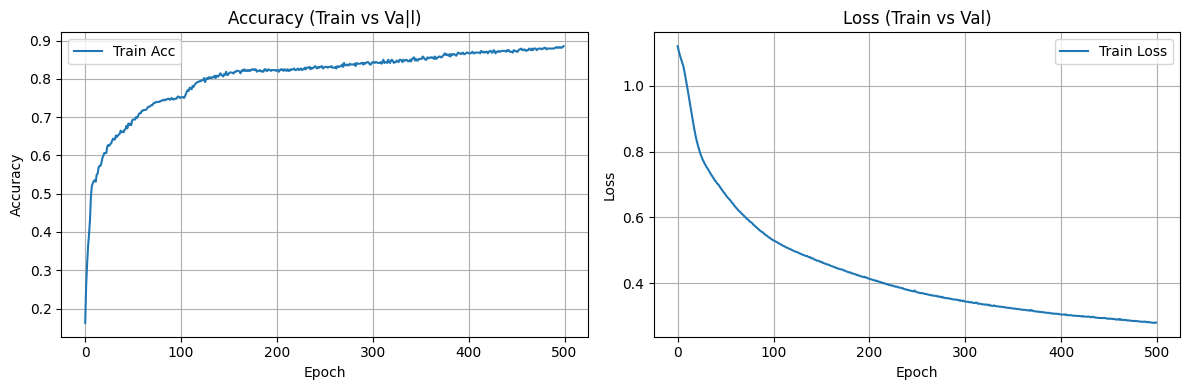

In [ ]:
plot_accuracy_and_loss(history_01)

In [ ]:
get_test_accuracy(model_mlp_02)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Accuracy: 0.8833333333333333


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Accuracy (All Features MLP): 0.8833333333333333


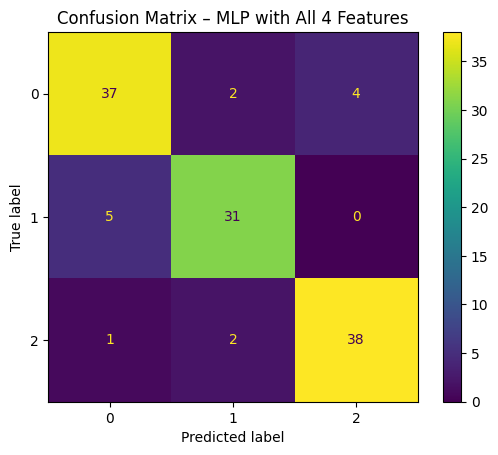

In [ ]:
# Predict probabilities
y_pred_probs = model_mlp_02.predict(x_test)

# Get predicted class indices
y_pred_full_2 = np.argmax(y_pred_probs, axis=1)

# Get true class indices from one-hot encoded y_test
y_test_classes = np.argmax(y_test, axis=1)

# Accuracy and confusion matrix
print("Accuracy (All Features MLP):", accuracy_score(y_test_classes, y_pred_full_2))

ConfusionMatrixDisplay(confusion_matrix(y_test_classes, y_pred_full_2)).plot()
plt.title("Confusion Matrix – MLP with All 4 Features")
plt.show()

In [ ]:
def plot_decision_boundary(model, X, y, title="Decision Boundary"):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = model.predict(grid)
    # Get the class with the highest probability
    probs = np.argmax(probs, axis=1)
    probs = probs.reshape(xx.shape) # Reshape to match the grid

    plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], cmap='Pastel2', alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='Set2')
    plt.title(title)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.show()

2813/2813 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


<ipython-input-30-8b156fd84b30>:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='Set2')


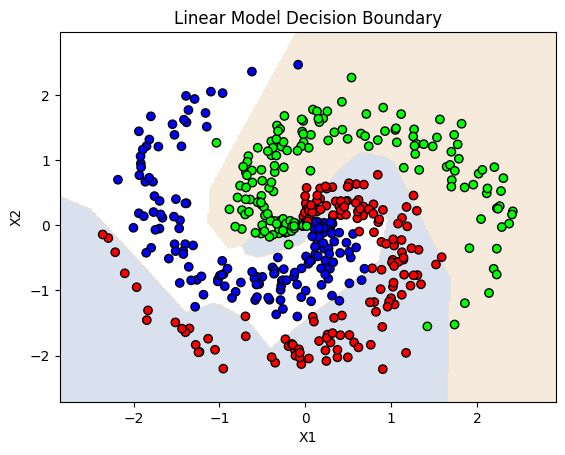

In [ ]:
plot_decision_boundary(model_mlp_02, x_train, y_train, "Linear Model Decision Boundary")


How did you decide the number of hidden layers and neurons?
> I started with the randomly choose layer and evaluate model accuracy.THen gradually increase layer and neurons as previous model not able to learn patteren or complexity due to 1 layer with 3 neuron.

How did different learning rates affect the results?
> At a specific time my model got stuck no loss at 50's and can not be decrease further.Then i decided to decrease learning rate so it can reach local minima and thats work for me.

Did you encounter overfitting or underfitting? How did you deal with it?
> Yes after fit my model multiple time with different parameters, model got overfit as it work best at training but not on testing.So i decided to use regularization techniques in order to deal with this issue. I choose early dropout to get best weights.

If you had more time, how would you further improve the model?
> If i had more time, i will train model with different regularization techniques such Dropouts to see result also try to improve accuaracy by trying different activation function etc.